# **Comparing Classifiers: Random Forest vs XGBoost**

This notebook focuses on evaluating the performance of **Random Forest** and **XGBoost** classifiers across both multi-class (normal, amplified, deleted) and binary (normal vs amplified) classification tasks. The goal is to determine the best-performing classifier to use for the subsequent multi-classification steps. 

---

### **Workflow**

1. **Multi-Class Classification: Normal, Amplified, Deleted**
   - Test both Random Forest and XGBoost on a three-class problem.
   - Generate **confusion matrices** and **classification reports** to evaluate the accuracy, precision, recall, and F1-score for each class.
   - Analyze the True Positive Rate (TPR) for each class to understand where the models perform well and where they struggle.


2. **Binary Classification: Normal vs Amplified**
   - Evaluate the performance of Random Forest and XGBoost on the binary classification task.
   - Generate **confusion matrices** and **classification reports** to assess metrics such as precision, recall, and F1-score.
   - Compare classifier performance to identify strengths and weaknesses.
   
3. **Performance Comparison**
   - Compare the performance of both classifiers on both tasks.
   - Highlight key metrics (accuracy, precision, recall, and F1-score) to determine which model is better suited for the **next multi-classification step**.

4. **Model Selection for Next Steps**
   - Based on the results of both binary and multi-class classification, decide whether Random Forest or XGBoost provides the best performance for further analysis.

---

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

### Loading the Combined DataFrame

In [18]:
combined_data = pd.read_pickle('combined_data.pkl')

## Comparing Classifiers

### Random Forest Multi-classification

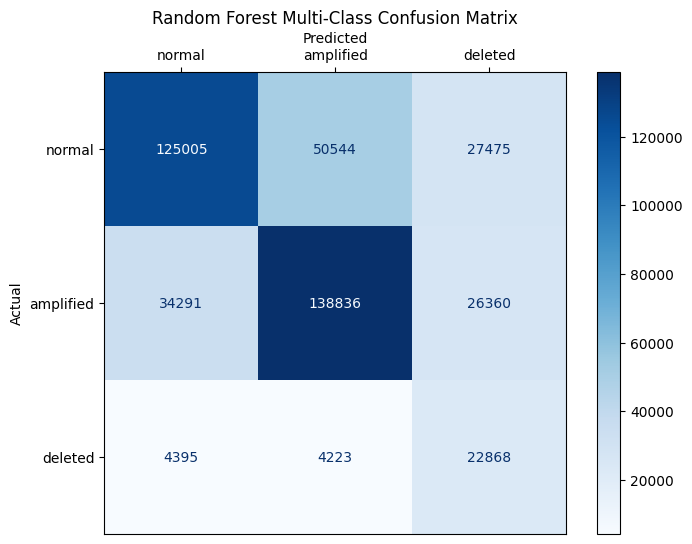

              precision    recall  f1-score   support

   amplified       0.72      0.70      0.71    199487
     deleted       0.30      0.73      0.42     31486
      normal       0.76      0.62      0.68    203024

    accuracy                           0.66    433997
   macro avg       0.59      0.68      0.60    433997
weighted avg       0.71      0.66      0.67    433997



In [19]:
# Split data into training and test sets
X = combined_data.drop(columns=['status'])  # Features (drop the target column)
y = combined_data['status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the model
# Helps handle class imbalance by assigning more weight to underrepresented classes
model = RandomForestClassifier(class_weight='balanced', n_jobs=4, random_state=42)
model.fit(X_train, y_train)

# Get predicted values for evaluating model performance
y_pred = model.predict(X_test)

# Create a multi-class confusion matrix
# Visualize how well the model predicts each class (normal, amplified, deleted)
cm = confusion_matrix(y_test, y_pred, labels=['normal', 'amplified', 'deleted'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'amplified', 'deleted'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')

# Move x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel("Predicted")

# Set the y-axis label and tick labels for both axes
ax.set_ylabel("Actual")
ax.set_xticklabels(['normal', 'amplified', 'deleted'])
ax.set_yticklabels(['normal', 'amplified', 'deleted'])

plt.title("Random Forest Multi-Class Confusion Matrix")
plt.show()

# Generate the classification report
print(classification_report(y_test, y_pred))


##### Summary of the Confusion Matrix Results

**Normal Class:**
- **True Positives** (correctly classified as normal): 125,005  
- **Misclassified as Amplified**: 50,544  
- **Misclassified as Deleted**: 27,475  
- **True Positive Rate** = (125,005 / 203,024) * 100 ≈ **61.56%**

---

**Amplified Class:**
- **True Positives** (correctly classified as amplified): 138,836  
- **Misclassified as Normal**: 34,291  
- **Misclassified as Deleted**: 26,360  
- **True Positive Rate** = (138,836 / 199,487) * 100 ≈ **69.59%**

---

**Deleted Class:**
- **True Positives** (correctly classified as deleted): 22,868  
- **Misclassified as Normal**: 4,395  
- **Misclassified as Amplified**: 4,223  
- **True Positive Rate** = (22,868 / 31,486) * 100 ≈ **72.64%**

---

### XGBoost Multi-classification

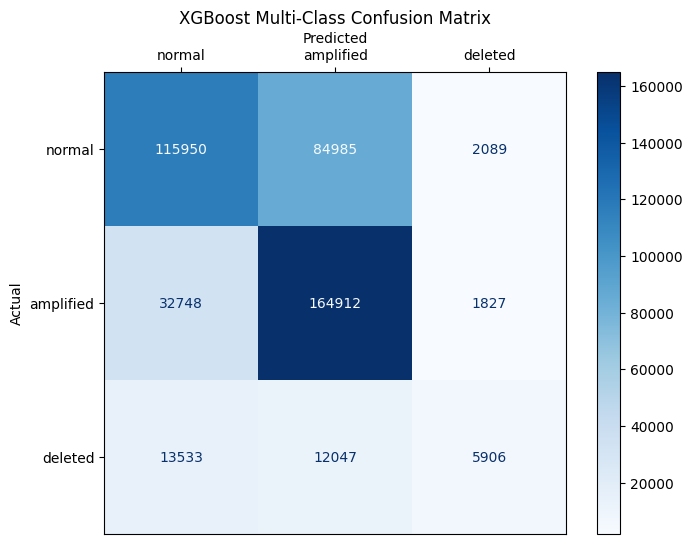

              precision    recall  f1-score   support

   amplified       0.63      0.83      0.71    199487
     deleted       0.60      0.19      0.29     31486
      normal       0.71      0.57      0.63    203024

    accuracy                           0.66    433997
   macro avg       0.65      0.53      0.55    433997
weighted avg       0.67      0.66      0.65    433997



In [20]:
# Encode target labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(combined_data['status'])  # Convert 'status' to numeric

# Split data into training and test sets
X = combined_data.drop(columns=['status'])  # Features
y = y_encoded  # Encoded target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train an XGBoost multi-class model
model = XGBClassifier(
    objective='multi:softprob',  # For multi-class classification
    eval_metric='mlogloss',      # Multi-class log loss
    learning_rate=0.1,
    n_estimators=100,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

# Get predicted values for evaluating model performance
y_pred = model.predict(X_test)

# Decode predictions and actual values back to categorical labels for the confusion matrix display
y_test_categorical = le.inverse_transform(y_test)
y_pred_categorical = le.inverse_transform(y_pred)

# Create a multi-class confusion matrix with categorical labels
cm = confusion_matrix(y_test_categorical, y_pred_categorical, labels=['normal', 'amplified', 'deleted'])

# Visualize the confusion matrix with categorical labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'amplified', 'deleted'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')

# Move x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel("Predicted")

# Set the y-axis label and tick labels for both axes
ax.set_ylabel("Actual")
ax.set_xticklabels(['normal', 'amplified', 'deleted'])
ax.set_yticklabels(['normal', 'amplified', 'deleted'])

plt.title("XGBoost Multi-Class Confusion Matrix")
plt.show()

# Generate the classification report
print(classification_report(y_test_categorical, y_pred_categorical))

##### Summary of the Confusion Matrix Results

**Normal Class**:
- **True Positives** (correctly classified as normal): 115,950  
- **Misclassified as Amplified**: 84,985  
- **Misclassified as Deleted**: 2,089  
- **True Positive Rate** = (115,950 / 203,024) * 100 ≈ **57.12%**

---

**Amplified Class**:
- **True Positives** (correctly classified as amplified): 164,912  
- **Misclassified as Normal**: 32,748  
- **Misclassified as Deleted**: 1,827  
- **True Positive Rate** = (164,912 / 199,487) * 100 ≈ **82.65%**

---

**Deleted Class**:
- **True Positives** (correctly classified as deleted): 5,906  
- **Misclassified as Normal**: 13,533  
- **Misclassified as Amplified**: 12,047  
- **True Positive Rate** = (5,906 / 31,486) * 100 ≈ **18.76%**

---

### Random Forest Binary Classification (Normal vs Amplified)

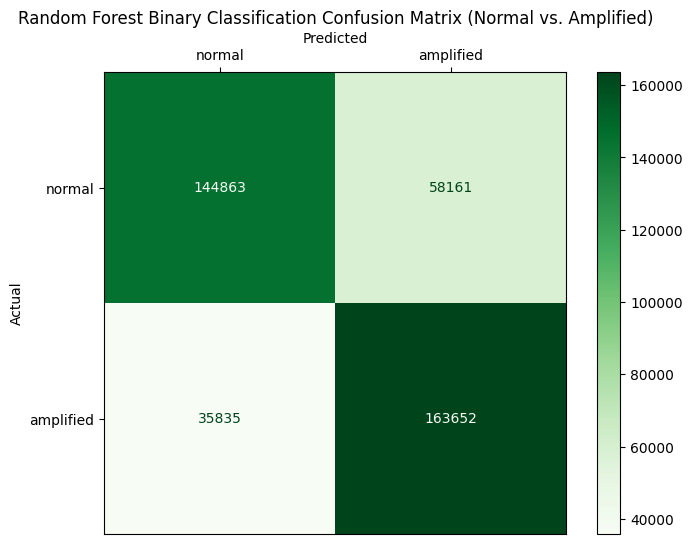

              precision    recall  f1-score   support

   amplified       0.74      0.82      0.78    199487
      normal       0.80      0.71      0.76    203024

    accuracy                           0.77    402511
   macro avg       0.77      0.77      0.77    402511
weighted avg       0.77      0.77      0.77    402511



In [21]:
# Exclude 'deleted' records and train on only 'normal' and 'amplified'
binary_data = combined_data[combined_data['status'] != 'deleted']
X_binary = binary_data.drop(columns=['status'])  # Features (drop the target column)
y_binary = binary_data['status']

# Split the binary dataset
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, stratify=y_binary, random_state=42)

# Train a new binary classification model
binary_model = RandomForestClassifier(class_weight='balanced', n_jobs=4, random_state=42)
binary_model.fit(X_train_bin, y_train_bin)

# Predict on the binary test set and create a confusion matrix
y_pred_bin = binary_model.predict(X_test_bin)
cm_bin = confusion_matrix(y_test_bin, y_pred_bin, labels=['normal', 'amplified'])

# Create a binary confusion matrix with similar styling to the multi-class version
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bin, display_labels=['normal', 'amplified'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Greens')

# Move x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel("Predicted")

# Set the y-axis label and tick labels for both axes
ax.set_ylabel("Actual")
ax.set_xticklabels(['normal', 'amplified'])
ax.set_yticklabels(['normal', 'amplified'])

plt.title("Random Forest Binary Classification Confusion Matrix (Normal vs. Amplified)")
plt.show()

# Generate the classification report
print(classification_report(y_test_bin, y_pred_bin))


##### Summary of the Confusion Matrix Results

**Normal Class**:
- **True Positives** (correctly classified as normal): 144,863  
- **Misclassified as Amplified**: 58,161  
- **True Positive Rate** = (144,863 / 203,024) * 100 ≈ **71.37%**

---

**Amplified Class**:
- **True Positives** (correctly classified as amplified): 163,652  
- **Misclassified as Normal**: 35,835  
- **True Positive Rate** = (163,652 / 199,487) * 100 ≈ **82.03%**

---

### XGBoost Binary Classification (Normal vs Amplified)

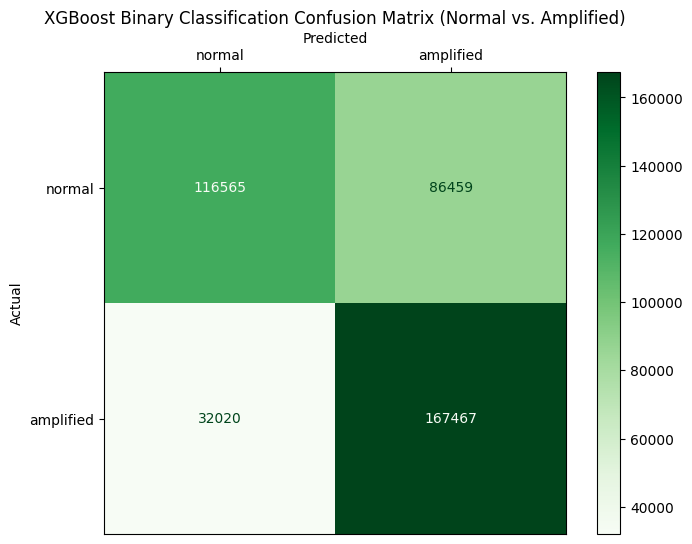

              precision    recall  f1-score   support

           0       0.66      0.84      0.74    199487
           1       0.78      0.57      0.66    203024

    accuracy                           0.71    402511
   macro avg       0.72      0.71      0.70    402511
weighted avg       0.72      0.71      0.70    402511



In [22]:
# Prepare the data for binary classification (excluding 'deleted')
binary_data = combined_data[combined_data['status'] != 'deleted']
X_binary = binary_data.drop(columns=['status']) 
y_binary = binary_data['status']

# Encode target labels for binary classification
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_binary_encoded = le.fit_transform(y_binary)

# Split data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary_encoded, test_size=0.2, stratify=y_binary_encoded, random_state=42)

# Train the XGBoost binary classifier
binary_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=6,
    random_state=42
)
binary_model.fit(X_train_bin, y_train_bin)

# Predict
y_pred_bin = binary_model.predict(X_test_bin)

# Decode the binary predictions and actual labels for consistent labeling
y_test_bin_categorical = le.inverse_transform(y_test_bin)
y_pred_bin_categorical = le.inverse_transform(y_pred_bin)

# Create a confusion matrix for binary classification with categorical labels
cm_bin = confusion_matrix(y_test_bin_categorical, y_pred_bin_categorical, labels=['normal', 'amplified'])

# Visualize the binary confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp_bin = ConfusionMatrixDisplay(confusion_matrix=cm_bin, display_labels=['normal', 'amplified'])
disp_bin.plot(ax=ax, cmap="Greens")

# Move x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel("Predicted")

# Set the y-axis label and tick labels for both axes
ax.set_ylabel("Actual")
ax.set_xticklabels(['normal', 'amplified'])
ax.set_yticklabels(['normal', 'amplified'])

plt.title("XGBoost Binary Classification Confusion Matrix (Normal vs. Amplified)")
plt.show()

# Generate the classification report
print(classification_report(y_test_bin, y_pred_bin))

##### Summary of the Confusion Matrix Results

**Normal Class**:
- **True Positives** (correctly classified as normal): 116,565  
- **Misclassified as Amplified**: 86,459  
- **True Positive Rate** = (116,565 / 203,024) * 100 ≈ **57.42%**

---

**Amplified Class**:
- **True Positives** (correctly classified as amplified): 167,467  
- **Misclassified as Normal**: 32,020  
- **True Positive Rate** = (167,467 / 199,487) * 100 ≈ **83.94%**

---